In [82]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

In [91]:
#data = pd.read_csv('../data/train.csv',usecols =['Age','SibSp', 'Fare','Survived'])
data = pd.read_csv('../data/train.csv',usecols =['Age','Fare','Survived'])
data.head()
data.isnull().sum()
data.dropna(inplace=True)
data.isnull().sum()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


Survived      0
Age         177
Fare          0
dtype: int64

Survived    0
Age         0
Fare        0
dtype: int64

In [31]:
X_train, X_test, y_train, y_test = train_test_split(data[['Age', 'Fare', 'Survived']],data.Survived , test_size = 0.3)

DecisionTreeClassifier(max_depth=2)

,Age,Fare,Survived,Age_tree
401,26.0,8.0500,0,0.384181
371,18.0,6.4958,0,0.235294
829,62.0,80.0000,1,0.384181
860,41.0,14.1083,0,0.384181
762,20.0,7.2292,1,0.235294
774,54.0,23.0000,1,0.384181
623,21.0,7.8542,0,0.235294
700,18.0,227.5250,1,0.235294
53,29.0,26.0000,1,0.384181
754,48.0,65.0000,1,0.384181


<AxesSubplot:>

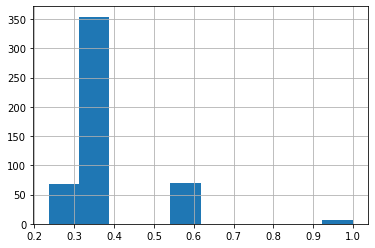

In [85]:
from sklearn import tree
np.random.seed(1234)
tree_model = tree.DecisionTreeClassifier(max_depth=2)
tree_model.fit(X_train.Age.to_frame(), X_train.Survived)
X_train['Age_tree']=tree_model.predict_proba(X_train.Age.to_frame())[:,1] 
X_train.head(10)
X_train['Age_tree'].hist()

In [86]:
X_train.Age_tree.unique()

array([0.38418079, 0.23529412, 0.57142857, 1.        ])

Above in input four, we have mentioned max_depth = 2. A tree of depth 2, makes 2 splits, therefore generating 4 buckets, that is why we see 4 different probabilities in the output above.

Age_tree
0.235294    0.235294
0.384181    0.384181
0.571429    0.571429
1.000000    1.000000
Name: Survived, dtype: float64

Text(0.5, 1.0, 'Monotonic relationship between discretised Age and target')

Text(0, 0.5, 'Survived')

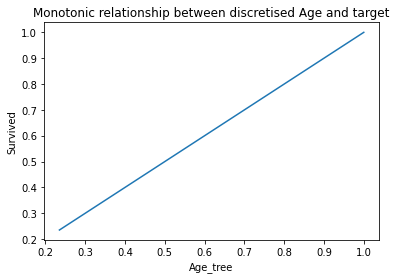

In [87]:
fig = plt.figure()
X_train.groupby(['Age_tree'])['Survived'].mean()
fig = X_train.groupby(['Age_tree'])['Survived'].mean().plot()
fig.set_title('Monotonic relationship between discretised Age and target')
fig.set_ylabel('Survived')

Here, we can see a monotonic relationship between the discretised variable andAge_tree the target variable Survived. That plot suggests that Age_tree seems like a good predictor of the target variable Survived .

<AxesSubplot:xlabel='Age_tree'>

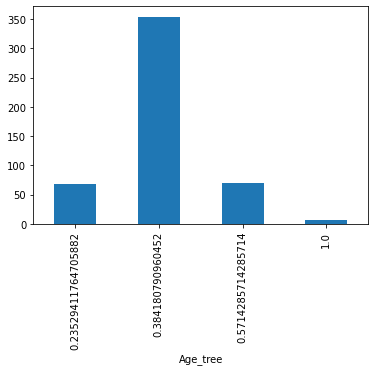

In [88]:
X_train.groupby(['Age_tree'])['Survived'].count().plot.bar()

In [89]:
pd.concat( [X_train.groupby(['Age_tree'])['Age'].min(),
            X_train.groupby(['Age_tree'])['Age'].max()], axis=1)

,Age,Age
Age_tree,,
0.235294,18.00,21.00
0.384181,22.00,70.50
0.571429,1.00,17.00
1.000000,0.42,0.92


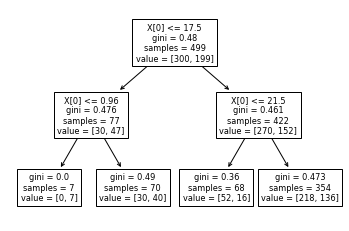

In [90]:
tree.plot_tree(tree_model);

In [75]:
from sklearn.model_selection import cross_val_score
score_ls = []     # here I will store the roc auc
score_std_ls = [] # here I will store the standard deviation of the roc_auc
for tree_depth in [1,2,3,4]:
    tree_model = tree.DecisionTreeClassifier(max_depth=tree_depth)
    
    scores = cross_val_score(tree_model, X_train.Age.to_frame(),       
    y_train, cv=3, scoring='roc_auc')   
    
    score_ls.append(np.mean(scores))
    
    score_std_ls.append(np.std(scores))
    
temp = pd.concat([pd.Series([1,2,3,4]), pd.Series(score_ls), pd.Series(score_std_ls)], axis=1)
temp.columns = ['depth', 'roc_auc_mean', 'roc_auc_std']
print(temp)

   depth  roc_auc_mean  roc_auc_std
0      1      0.522134     0.018673
1      2      0.531049     0.025862
2      3      0.540064     0.021558
3      4      0.552526     0.026694


In [76]:
tree_model = tree.DecisionTreeClassifier(max_depth=2)
tree_model.fit(X_train.Age.to_frame(), X_train.Survived)

DecisionTreeClassifier(max_depth=2)

In [77]:
X_train['Age_tree'] = tree_model.predict_proba(X_train.Age.to_frame())[:,1]
X_test['Age_tree'] = tree_model.predict_proba(X_test.Age.to_frame())[:,1]

In [78]:
X_train.head()

,Age,Fare,Survived,Age_tree
401,26.0,8.0500,0,0.384181
371,18.0,6.4958,0,0.235294
829,62.0,80.0000,1,0.384181
860,41.0,14.1083,0,0.384181
762,20.0,7.2292,1,0.235294


In [79]:
X_train.Age_tree.unique()

array([0.38418079, 0.23529412, 0.57142857, 1.        ])

In [80]:
X_test.Age_tree.unique()

array([0.38418079, 0.57142857, 0.23529412])